<a href="https://colab.research.google.com/github/BI-DS/ELE-3909/blob/master/tutoring1/session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

## Hierarchical clustering

### Computer Programs, 13.1 (page 695)

In [ ]:
# we will use that for testing our function
sample_matrix = np.array([[0, 1, 2, 3, 10], [1, 0, 4, 5, 12], [2, 4, 0, 8, 20], [3, 5, 8, 0, 4], [10, 12, 20, 4, 0]])
sample_matrix

array([[ 0,  1,  2,  3, 10],
       [ 1,  0,  4,  5, 12],
       [ 2,  4,  0,  8, 20],
       [ 3,  5,  8,  0,  4],
       [10, 12, 20,  4,  0]])

In [ ]:
def convert_prox_mat(prox_mat):
    """
    Input:
    prox_mat - N*N proximity matrix

    Output:
    proc_vec - N*(N-1)/2 row vector of upper diagonal elements of prox_mat
    """

    N = prox_mat.shape[0]
    vector_size = int(N * (N - 1) / 2)
    proc_vec = np.zeros(vector_size)

    individual_vector_index = 0
    for v in range(N-1):
        proc_vec[individual_vector_index: individual_vector_index + (N - 1 - v)] = prox_mat[v, v + 1:N]
        individual_vector_index += (N - 1 - v)

    return proc_vec

In [ ]:
test_result = convert_prox_mat(sample_matrix)
test_result

array([ 1.,  2.,  3., 10.,  4.,  5., 12.,  8., 20.,  4.])

### Compute dissimilarity matrix based on sample vectors (data points)

In [ ]:
sample_points = np.array([[0, 3], [4, 0], [2, 2], [10, 10], [9, 6]])
sample_points

array([[ 0,  3],
       [ 4,  0],
       [ 2,  2],
       [10, 10],
       [ 9,  6]])

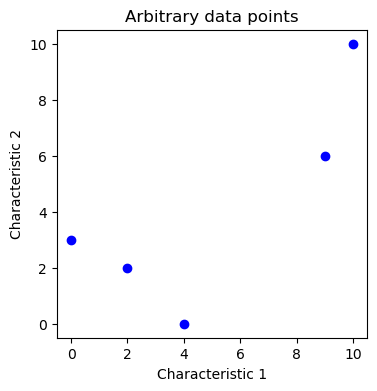

In [ ]:
# visualize sample data
plt.figure(figsize=(4, 4))
plt.scatter(sample_points[:,0], sample_points[:, 1], c='b')
plt.xlabel("Characteristic 1")
plt.ylabel("Characteristic 2")
plt.title("Arbitrary data points")
plt.show()

In [ ]:
def vectors_to_proximity(points):
    """
    Input:
    points - N * K matrix,
        where N - number of vectors (observations, points),
        K - number of dimensions, in our case it is always equal to 2

    Output:
    prox_mat - N * N proximity matrix
    """

    N = points.shape[0]
    prox_mat = np.zeros((N, N))

    for i in range(N):
        for j in range(N):
            prox_mat[i, j] = ((points[i][0] - points[j][0]) ** 2 + (points[i][1] - points[j][1]) ** 2) ** (1/2)

    return prox_mat

In [ ]:
# apply the function to sample data
proximity_matrix = vectors_to_proximity(sample_points)
proximity_matrix

array([[ 0.        ,  5.        ,  2.23606798, 12.20655562,  9.48683298],
       [ 5.        ,  0.        ,  2.82842712, 11.66190379,  7.81024968],
       [ 2.23606798,  2.82842712,  0.        , 11.3137085 ,  8.06225775],
       [12.20655562, 11.66190379, 11.3137085 ,  0.        ,  4.12310563],
       [ 9.48683298,  7.81024968,  8.06225775,  4.12310563,  0.        ]])

In [ ]:
# and convert it to a vector of proximities
proximity_vector = convert_prox_mat(proximity_matrix)
proximity_vector

array([ 5.        ,  2.23606798, 12.20655562,  9.48683298,  2.82842712,
       11.66190379,  7.81024968, 11.3137085 ,  8.06225775,  4.12310563])

### Computer Experiments: 13.1 (page 697)

In [ ]:
# data.csv contains the matrix from the book
proximity_matrix = np.loadtxt("data.csv", delimiter=",", dtype=float)
proximity_matrix

array([[  0. ,   2. ,   4.2,   6.6,   9.2,  12. ,  15. , 300. , 340. ,
        420. ],
       [  2. ,   0. ,   2.2,   4.6,   7.2,  10. ,  13. , 280. , 320. ,
        400. ],
       [  4.2,   2.2,   0. ,   2.4,   5. ,   7.8,  10.8, 270. , 310. ,
        390. ],
       [  6.6,   4.6,   2.4,   0. ,   2.6,   5.4,   8.4, 260. , 300. ,
        380. ],
       [  9.2,   7.2,   5. ,   2.6,   0. ,   2.8,   5.8, 262. , 296. ,
        388. ],
       [ 12. ,  10. ,   7.8,   5.4,   2.8,   0. ,   3. , 316. , 280. ,
        414. ],
       [ 15. ,  13. ,  10.8,   8.4,   5.8,   3. ,   0. , 380. , 326. ,
        470. ],
       [300. , 280. , 270. , 260. , 262. , 316. , 380. ,   0. ,   4. ,
          4.4],
       [340. , 320. , 310. , 300. , 296. , 280. , 326. ,   4. ,   0. ,
          9. ],
       [420. , 400. , 390. , 380. , 388. , 414. , 470. ,   4.4,   9. ,
          0. ]])

In [ ]:
# use the previously developed function convert_prox_mat to get a proximity vector
# this is needed as we won't use linkage function for the calculation of proximity matrix, but just to perform clustering
proximity_vector = convert_prox_mat(proximity_matrix)
proximity_vector.shape # 10 * (10 - 1) / 2 = 45 elements

(45,)

In [ ]:
# perform clustering
single = linkage(proximity_vector, method='single')
complete = linkage(proximity_vector, method='complete')
avg = linkage(proximity_vector, method='average')
ward = linkage(proximity_vector, method='ward')

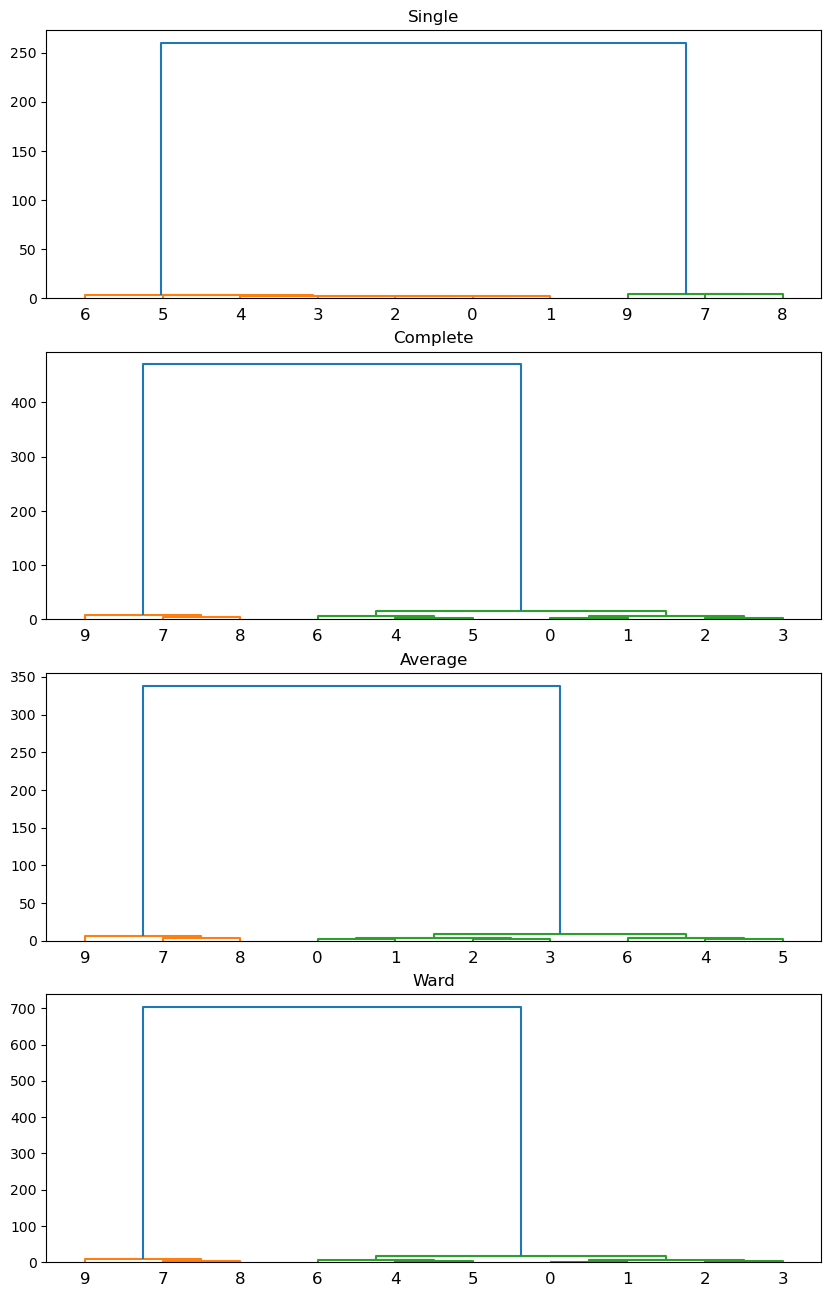

In [ ]:
# visualize the result
plt.figure(figsize=(10, 16))
plt.subplot(4,1,1), dendrogram(single), plt.title('Single')
plt.subplot(4,1,2), dendrogram(complete), plt.title('Complete')
plt.subplot(4,1,3), dendrogram(avg), plt.title('Average')
plt.subplot(4,1,4), dendrogram(ward), plt.title('Ward')
plt.show()